<a href="https://colab.research.google.com/github/BiplobKarmakar/hyundai_used_car_analysis/blob/main/Hyundai_used_Car_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment
1. Choose one dataset (audi, ford, hyundai, toyota, skoda, vw) from this link: https://github.com/SKawsar/Data_Visualization_with_Python
Original data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw
2. Perform Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType,
A. What are the top 5 selling car models/transmission/fuelType in the dataset?
B. What's the average selling price of the top 5 selling car models/transmission/fuelType?
C. What's the total sale of the top 5 selling car models/transmission/fuelType?

3. If you participated in module 2, you can perform your analysis in the same repository/.ipynb file you used for module 2.
4. Code must be submitted through GitHub. Attach a direct link to your repository. Example repository name: bmw_used_car_analysis, toyota_used_car_analysis etc. The name of the repository shouldn't be hw3, HW3, emk_HW3 or similar. Example Notebook name: bmw_used_car_EDA.ipynb, audi_used_car_EDA.ipynb etc. EDA means Exploratory Data Analysis. Proper naming is important for a good GitHub profile. Hiring managers/Recruiters look for an organized GitHub profile. 
5. Please run all cells before you upload/push your code on GitHub. Check YouTube if you don't know how to share code through Github.
6. Use the Markdown cell for proper commenting and make sure the code is easily understandable. Use the .head() or .tail() method when necessary rather than displaying all the rows in the dataframe.
7. Make sure your code is reusable and reproducible.


**Importing necessary library**

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

**Importing csv File for hyundai car**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hyundai.csv to hyundai.csv


**Top Five data**

In [3]:
df = pd.read_csv("hyundai.csv")
display(df.head())


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0


**Last Five data**

In [68]:
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
4855,I30,2016,8680,Manual,25906,Diesel,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6
4859,Tucson,2016,15999,Automatic,11472,Diesel,57.6,1.7


**All model names**

In [4]:
print(df['model'].unique())


[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']


**All Transmission type**

In [5]:
print(df['transmission'].unique())


['Manual' 'Automatic' 'Semi-Auto' 'Other']


**All Fuel Type**

In [6]:
print(df['fuelType'].unique())


['Petrol' 'Diesel' 'Hybrid' 'Other']


**Data Aggregation with respect to Model**





In [11]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
Accent,1,1295.000000,1295
Amica,1,1750.000000,1750
Getz,6,1927.500000,11565
I10,1092,7741.870879,8454123
I20,496,8810.721774,4370118
I30,536,11609.555970,6222722
I40,127,10927.188976,1387753
I800,117,16659.076923,1949112
IX20,204,8812.867647,1797825


**Data Preprocessing before Visualization**

In [64]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())


,mean,sum,percent_of_cars
transmission,,,
Manual,11059.05,39.93,74.30
Automatic,16369.22,10.95,13.77
Semi-Auto,19119.22,11.05,11.89
Other,14745.00,0.03,0.04


**Barplot: Percentage of cars, Average and Total selling price of cars by model**
<br> Based on model</br>
<br> Top 5 selling car models in the dataset</br>
<br> Average selling price of the top 5 selling car models</br>
 <br>Total sale of the top 5 selling car models</br>





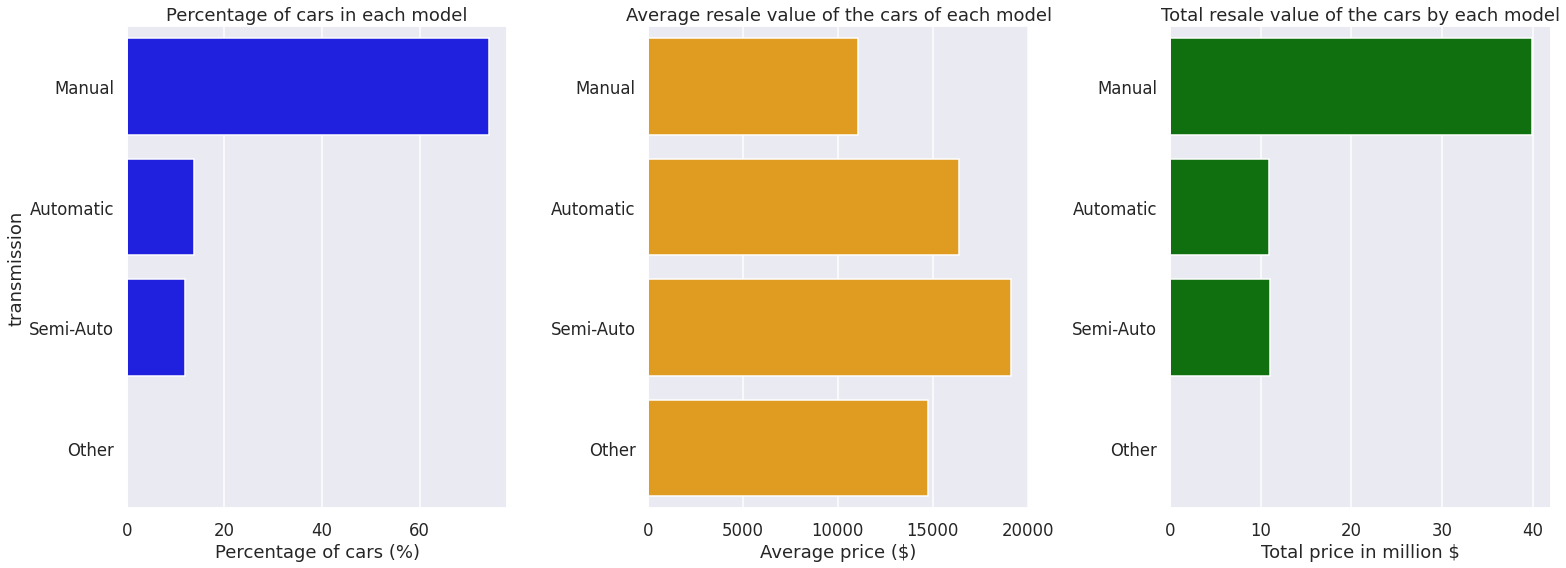

In [65]:

plt.figure(figsize=(22,8))


plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")



plt.tight_layout()
plt.show()


**Data Aggregation with respect to Transmission**


In [41]:
df_agg1 = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg1)

,count,mean,sum
transmission,,,
Automatic,669,16369.224215,10951011
Manual,3611,11059.049571,39934228
Other,2,14745.000000,29490
Semi-Auto,578,19119.217993,11050908


 **Data Preprocessing before Visualization**

In [44]:
# sort the dataframe based on the column 'count'
df_agg1 = df_agg1.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg1['percent_of_cars'] = (df_agg1['count']/df_agg1['count'].sum())*100

# convert the 'sum' column in millions
df_agg1['sum'] = df_agg1['sum']/1000000

# keep up to two decimal points
df_agg1 = df_agg1.round(2)

# remove the 'count' column
df_agg1 = df_agg1.drop('count', axis=1)

display(df_agg1.head())


,mean,sum,percent_of_cars
transmission,,,
Manual,11059.05,39.93,74.30
Automatic,16369.22,10.95,13.77
Semi-Auto,19119.22,11.05,11.89
Other,14745.00,0.03,0.04


**Barplot: Percentage of cars, Average and Total selling price of cars by Transmission**
<br> Based on Transmission</br>
<br> Top 5 selling car Transmission type  in the dataset</br>
<br> Average selling price of the top 5 selling car Transmission Type</br>
 <br>Total sale of the top 5 selling car Transmission Type</br>





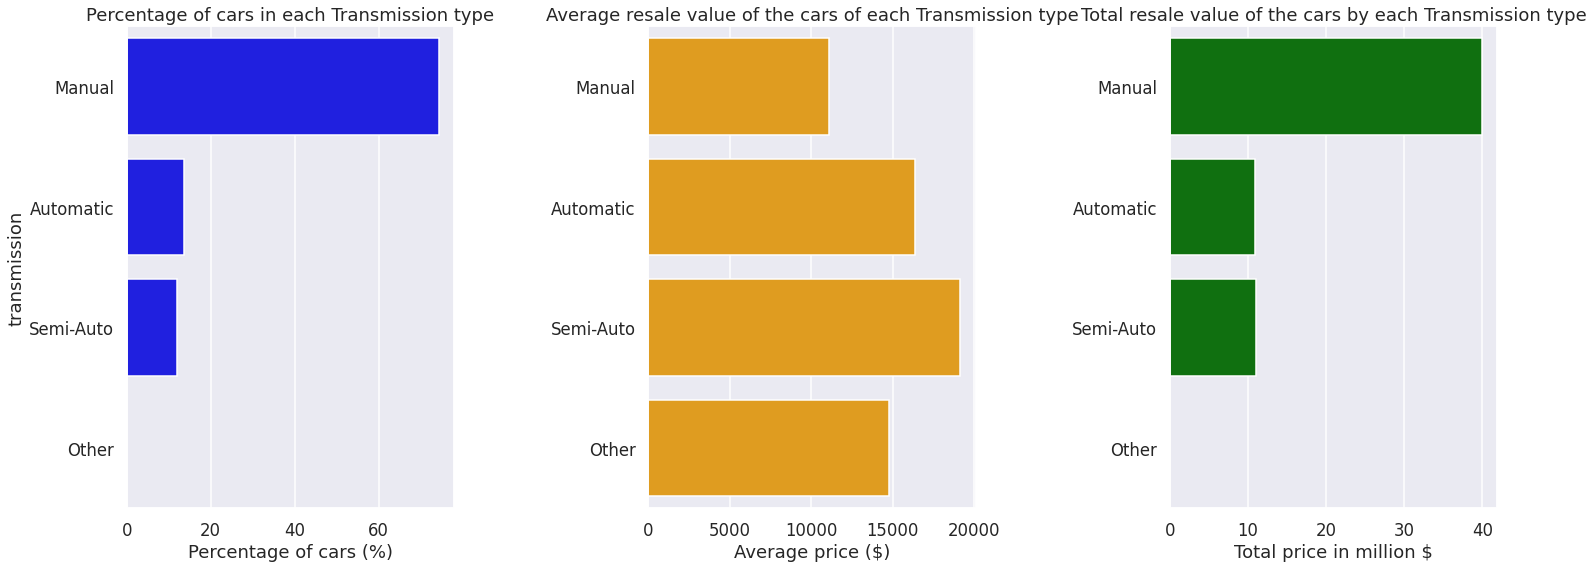

In [62]:
plt.figure(figsize=(22,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg1.index, data=df_agg1, orient='h', color='blue')
plt.title("Percentage of cars in each Transmission type")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg1.index, data=df_agg1, orient='h', color='orange')
plt.title("Average resale value of the cars of each Transmission type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg1.index, data=df_agg1, orient='h', color='green')
plt.title("Total resale value of the cars by each Transmission type")
plt.xlabel("Total price in million $")
plt.ylabel("")



plt.tight_layout()
plt.show()


**Data Aggregation with respect to FuelType**


In [55]:
df_agg2 = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg2)

,count,mean,sum
fuelType,,,
Diesel,1608,14589.905473,23460568
Hybrid,349,19223.272206,6708922
Other,1,12800.000000,12800
Petrol,2902,10952.221571,31783347


 **Data Preprocessing before Visualization**

In [56]:
# sort the dataframe based on the column 'count'
df_agg2 = df_agg2.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg2['percent_of_cars'] = (df_agg2['count']/df_agg2['count'].sum())*100

# convert the 'sum' column in millions
df_agg2['sum'] = df_agg2['sum']/1000000

# keep up to two decimal points
df_agg2 = df_agg2.round(2)

# remove the 'count' column
df_agg2 = df_agg2.drop('count', axis=1)

display(df_agg2.head())


,mean,sum,percent_of_cars
fuelType,,,
Petrol,10952.22,31.78,59.71
Diesel,14589.91,23.46,33.09
Hybrid,19223.27,6.71,7.18
Other,12800.00,0.01,0.02


**Barplot: Percentage of cars, Average and Total selling price of cars by FuelType**

Based on FuelType

Top 5 selling FuelType car  in the dataset

Average selling price of the top 5 selling FuelType car 

Total sale of the top 5 selling FuelType car 

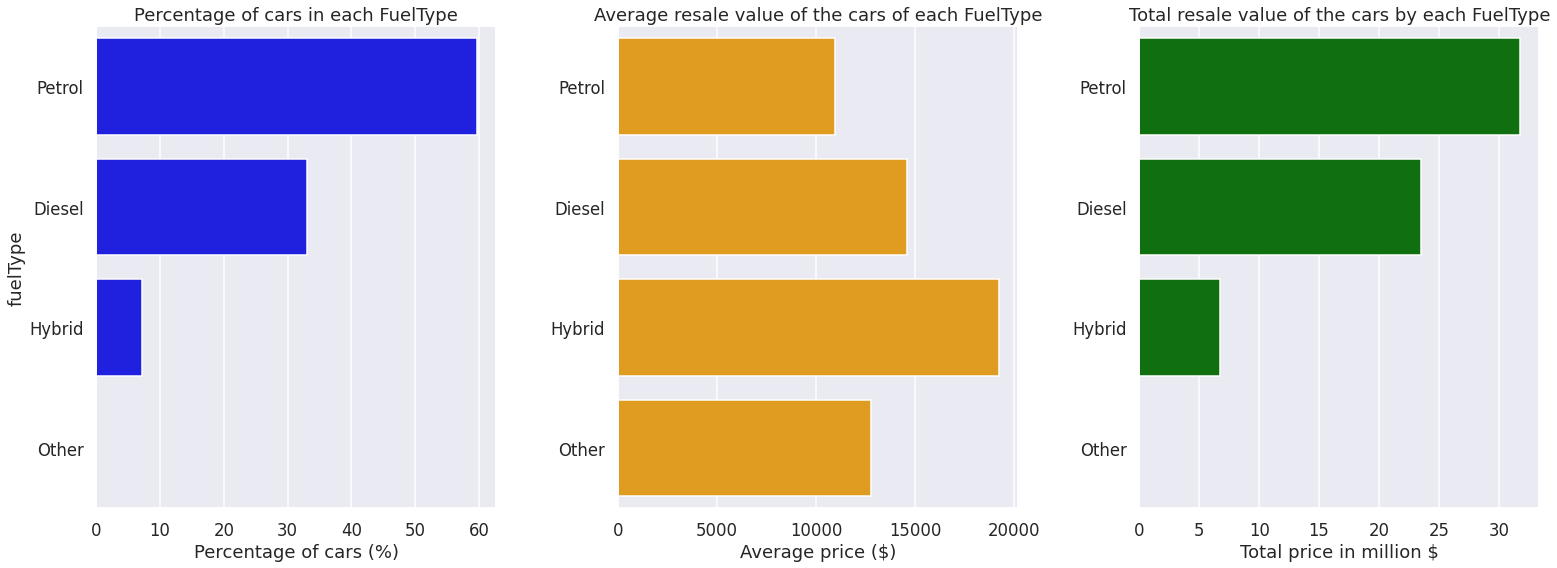

In [67]:
plt.figure(figsize=(22,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg2.index, data=df_agg2, orient='h', color='blue')
plt.title("Percentage of cars in each FuelType")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg2.index, data=df_agg2, orient='h', color='orange')
plt.title("Average resale value of the cars of each FuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg2.index, data=df_agg2, orient='h', color='green')
plt.title("Total resale value of the cars by each FuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")



plt.tight_layout()
plt.show()
